shape of raw image data:(1797, 8, 8)
shape of data:(1797, 64)


['digits_svm.pkl']

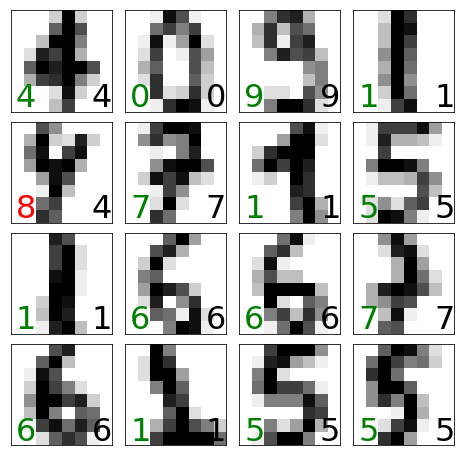

In [6]:
# 手写数字识别
%matplotlib inline
import matplotlib.pyplot as plt
# 数据采集和标记
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.externals import joblib

digits = datasets.load_digits()
images_and_labels = list(zip(digits.images,digits.target))
''' 
plt.figure(figsize = (8,6),dpi=200)
for index, (image,label) in enumerate(images_and_labels[:8]):
    plt.subplot(2,4,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title("Digit:%i" % label,fontsize=20)
'''
# 特征选择
print("shape of raw image data:{0}".format(digits.images.shape))
print("shape of data:{0}".format(digits.data.shape))
# 数据清洗
# 将所有图片都转换为 8 * 8 分辨率
# 模型选择 SVM
# 模型训练
Xtrain,Xtest,Ytrain,Ytest = train_test_split(digits.data,digits.target,test_size=0.20,random_state=2)

clf = svm.SVC(gamma = 0.001, C=100.)
clf.fit(Xtrain,Ytrain)

# 模型测试
Ypred = clf.predict(Xtest);
clf.score(Xtest,Ypred)

fig,axes = plt.subplots(4,4,figsize=(8,8))
fig.subplots_adjust(hspace=0.1,wspace=0.1)

for i,ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8,8),cmap=plt.cm.gray_r,interpolation='nearest')
    ax.text(0.05,0.05,str(Ypred[i]),fontsize=32,transform=ax.transAxes,color='green' if Ypred[i]==Ytest[i] else 'red')
    ax.text(0.8,0.05,str(Ytest[i]),fontsize=32,transform=ax.transAxes,color='black')
    ax.set_xticks([])
    ax.set_yticks([])
    
# 模型保存和加载
joblib.dump(clf,'digits_svm.pkl')